In [14]:
import scipy
from scipy import stats
import numpy as np
import pandas as pd
dice_points = [1,2,3,4,5,6]
dice_points_count = 6

player_num = 3
dice_num_per_player = 5

dice_num_total = dice_num_per_player * player_num


dice_num_choice = np.arange(dice_num_total + 1)
for dice_num in dice_num_choice:
    print('dice_num' , dice_num)
    print('{:.2%}'.format(round(1-stats.binom.cdf(dice_num-1, dice_num_total, 1 / 6),4)))


dice_num 0
100.00%
dice_num 1
93.51%
dice_num 2
74.04%
dice_num 3
46.78%
dice_num 4
23.15%
dice_num 5
8.98%
dice_num 6
2.74%
dice_num 7
0.66%
dice_num 8
0.13%
dice_num 9
0.02%
dice_num 10
0.00%
dice_num 11
0.00%
dice_num 12
0.00%
dice_num 13
0.00%
dice_num 14
0.00%
dice_num 15
0.00%


In [54]:
# Game begins


dice_in_hand = [1,4,6,3,6]
dice_in_hand_point_count = [0,0,0,0,0,0]
for dice in dice_in_hand:
    dice_in_hand_point_count[dice-1] += 1

game_dice_num = 3
game_point_chosen = 3

# Two choices

# Choice 1: add dice num while not changing dice point
dice_num_added = 1
print('{:d}个{:d}'.format((game_dice_num) + dice_num_added,game_point_chosen))
print('{:.2%}'.format(round(1-stats.binom.cdf((game_dice_num-1) + dice_num_added - dice_in_hand_point_count[game_point_chosen-1], (player_num-1) * dice_num_per_player, 1 / 6),4)))

# Choice 2: add dice num and change dice point
point_in_hand_max_count = dice_in_hand_point_count.index(max(dice_in_hand_point_count))+1
dice_num_added = 1
print('{:d}个{:d}'.format((game_dice_num) + dice_num_added,point_in_hand_max_count))
print('{:.2%}'.format(round(1-stats.binom.cdf((game_dice_num-1) + dice_num_added - dice_in_hand_point_count[point_in_hand_max_count-1], (player_num-1) * dice_num_per_player, 1 / 6),4)))



4个3
22.48%
4个6
51.55%


In [197]:
import random
class player():
    def __init__(self, dices=None):
        self.dice_in_hand = []
        if dices is None:
            for i in range(5):
                self.dice_in_hand.append(random.randint(1,6))
        else:
            self.dice_in_hand = dices
    def choice(self,choice,num,point):
        if choice == 0:
            print('开')
        elif choice == 1:
            print('{:d}个{:d}'.format(num,point))
        else:
            print('error')
    def print_dice_in_hand(self):
        print(self.dice_in_hand)
    def technical_analysis(self,player_num,game_dice_num,game_point_chosen,is_one_out=False):
        dice_in_hand_point_count = [0,0,0,0,0,0]
        for dice in self.dice_in_hand:
            dice_in_hand_point_count[dice-1] += 1
        point_in_hand_max_count = dice_in_hand_point_count.index(max(dice_in_hand_point_count))+1
        if not is_one_out:
            one_in_hand_count = dice_in_hand_point_count[0]
            if point_in_hand_max_count == 1:
                # Choice 1: choose the point is next to 1
                temp_dice_in_hand_point_count = dice_in_hand_point_count.copy()
                temp_dice_in_hand_point_count[temp_dice_in_hand_point_count.index(max(temp_dice_in_hand_point_count))] = 0
                new_point_in_hand_max_count = temp_dice_in_hand_point_count.index(max(temp_dice_in_hand_point_count))+1
                dice_num_added = 1
                print('{:d}个{:d}'.format((game_dice_num) + dice_num_added,new_point_in_hand_max_count))
                print('{:.2%}'.format(round(1-stats.binom.cdf((game_dice_num-1) + dice_num_added - dice_in_hand_point_count[new_point_in_hand_max_count-1]-one_in_hand_count, (player_num-1) * dice_num_per_player, 2 / 6),4)))
                # Choice 2: choose 1 as the point
                print('{:d}个{:d}'.format((player_num),1))
                print('{:.2%}'.format(round(1-stats.binom.cdf((player_num-1)  - one_in_hand_count, (player_num-1) * dice_num_per_player, 1 / 6),4)))

            else:
                # Choice 1: add dice num while not changing dice point
                dice_num_added = 1
                print('{:d}个{:d}'.format((game_dice_num) + dice_num_added,game_point_chosen))
                # print('{:.2%}'.format(round(1-stats.binom.cdf((game_dice_num + dice_num_added - dice_in_hand_point_count[game_point_chosen-1]-one_in_hand_count) * 2 - 1, (player_num-1) * dice_num_per_player, 1 / 6),4)))
                print('{:.2%}'.format(round(1-stats.binom.cdf((game_dice_num-1) + dice_num_added - dice_in_hand_point_count[game_point_chosen-1]-one_in_hand_count, (player_num-1) * dice_num_per_player, 2 / 6),4)))

                # Choice 2: add dice num and change dice point
                dice_num_added = 1
                print('{:d}个{:d}'.format((game_dice_num) + dice_num_added,point_in_hand_max_count))
                print('{:.2%}'.format(round(1-stats.binom.cdf((game_dice_num-1) + dice_num_added - dice_in_hand_point_count[point_in_hand_max_count-1]-one_in_hand_count, (player_num-1) * dice_num_per_player, 2 / 6),4)))
        else:
            # Choice 1: add dice num while not changing dice point
            dice_num_added = 1
            print('{:d}个{:d}'.format((game_dice_num) + dice_num_added,game_point_chosen))
            print('{:.2%}'.format(round(1-stats.binom.cdf((game_dice_num-1) + dice_num_added - dice_in_hand_point_count[game_point_chosen-1], (player_num-1) * dice_num_per_player, 1 / 6),4)))

            # Choice 2: add dice num and change dice point
            dice_num_added = 1
            print('{:d}个{:d}'.format((game_dice_num) + dice_num_added,point_in_hand_max_count))
            print('{:.2%}'.format(round(1-stats.binom.cdf((game_dice_num-1) + dice_num_added - dice_in_hand_point_count[point_in_hand_max_count-1], (player_num-1) * dice_num_per_player, 1 / 6),4)))


In [200]:
player1 = player()
player2 = player([1,1,2,2,3])
player3 = player()
player1.print_dice_in_hand()
player2.print_dice_in_hand()
player3.print_dice_in_hand()

[1, 4, 2, 6, 6]
[1, 1, 2, 2, 3]
[5, 6, 6, 3, 5]


In [204]:
player2.technical_analysis(3,5,2,False)

6个2
89.60%
3个1
83.85%


In [169]:
player1.print_dice_in_hand()
game_dice_num = 3
game_point_chosen = 3
player1.technical_analysis(3,game_dice_num,game_point_chosen)

[4, 4, 4, 6, 2]
4个3
44.07%
4个4
83.85%


In [98]:
def prob(x,n):
    # 假设实际某花色个数为 k
    # n 个里 x > k 的概率
    p1 = stats.binom.cdf(x-1,n,1/6)

    # n 个里至少有 x 个某个 point 的概率: x <= k
    return 1 - stats.binom.cdf(x-1,n,1/6)
t = prob(2,15)
print('{:.2%}'.format(t))

74.04%


# Monte Carlo simulation

In [14]:
total = 10
win_count = 0
test_count = 500
record_win_rate = []
# 44.07%
import random
for test in range(test_count):
    dices = []
    for i in range(total):
        dices.append(random.randint(1,6))
    if dices.count(1) + dices.count(3) >= 4:
        win_count += 1
    record_win_rate.append(win_count/(test+1))
    print('{:3.2%}'.format((test+1)/test_count) +'[' +'*'*int((test+1)/test_count * 10) + '-'*(10-int((test+1)/test_count * 10)) + ']',end='\r',sep='')
    # print('{:.2%}\r'.format((test+1)/test_count),end='')
print(' '*30,end='\r')
print('result: {:.2%}'.format(win_count/test_count))


result: 44.80%                


AttributeError: 'list' object has no attribute 'shape'

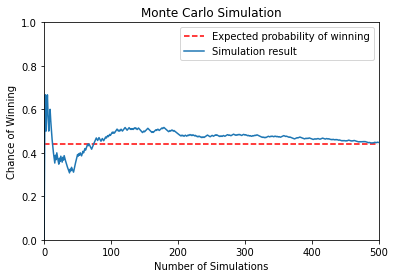

In [18]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(range(500), 0.4407*np.ones(500), 'r--', label='Expected probability of winning')
plt.plot(record_win_rate[:500],label='Simulation result')
plt.xlim(0,500)
plt.ylim(0,1)
# 图例,标题,坐标轴标签
# 标签
plt.xlabel('Number of Simulations')
plt.ylabel('Chance of Winning')
plt.legend()
plt.title('Monte Carlo Simulation')
# save
plt.savefig('Monte Carlo Simulation.jpg',dpi=300,bbox_inches='tight')
plt.show()



In [146]:
print('12345678' + '\b\b\b\b\b')

1234567


In [193]:
l1 = [3,0,1,0,1]

In [196]:
l2 = l1.copy()
l2[l2.index(max(l2))] = 0
l2.index(max(l2))

2

In [23]:
import numpy as np
input = '1, 2,3'
l = np.array(input.replace(' ','').split(','),dtype=int)

In [25]:
l.tolist()

[1, 2, 3]

In [7]:
bool(int("0"))

False

In [2]:
l = []
l.append(1)
l.append(2)
l

[1, 2]